**Finding the optimum clusters using k-medoid clustering**

Input: 
- Matrix of ATG affected proteins and patient Ids 

In [2]:
#Create data frame with affected proteins and patients

import pandas as pd

df_matrix = pd.read_csv('/Users/rb1425/Documents/PHD/isnp_atg/RB_ISNP_ATG/output files/CD_affected_atg_patients.tsv', sep='\t')
df_matrix.set_index('Affected protein', inplace=True)
df_matrix




,mapped_2905_2905,mapped_6026_6026,mapped_9031_9031,mapped_678_678,mapped_8069_8069,mapped_9329_9329,mapped_6469_6469,mapped_8737_8737,mapped_5062_5062,mapped_347_347,...,mapped_2524_2524,mapped_46_46,mapped_8697_8697,mapped_7584_7584,mapped_6366_6366,mapped_3266_3266,mapped_9268_9268,mapped_8794_8794,mapped_4382_4382,mapped_5225_5225
Affected protein,,,,,,,,,,,,,,,,,,,,,
IRF2,0,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
GMEB2,1,1,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,0,0
RHOXF1,0,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
NFIX,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
ESR1,1,0,1,0,0,0,1,1,1,1,...,0,0,1,1,1,1,1,0,1,0
MITF,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
RARA,0,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
ZNF460,1,0,0,1,0,1,0,1,1,0,...,1,1,1,0,0,1,0,1,1,0
TP63,1,0,1,0,1,0,1,1,1,1,...,1,0,1,1,1,0,0,1,1,1


We create a k-medoid clustering algorithim and plots to find the ideal number of cludters using the inertia and silhouette scores.

This can optionally be stored in a .tsv file 

In [3]:
input_data = df_matrix.T 
print(input_data.shape)

(1695, 59)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform 


sum_of_squared_distances = []
silhouette_scores = []
input_data = input_data.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
distance_matrix = pdist(input_data.to_numpy(), metric = 'jaccard')
distance_matrix = squareform(distance_matrix) 
K= range(2,30)
for k in K:
    kmed = KMedoids(n_clusters=k, random_state = 42, metric="jaccard")
    kmed = kmed.fit(input_data)
    sum_of_squared_distances.append(kmed.inertia_)
    silhouette_score_per_k = silhouette_score(distance_matrix, 
                                              kmed.predict(input_data),
                                              metric="precomputed", 
                                              random_state = 10)
    silhouette_scores.append(silhouette_score_per_k)

#Store results 
cluster_results = pd.DataFrame({'Number of clusters': K, 
                        'Inertia': sum_of_squared_distances, 
                        'Average silhouette score': silhouette_scores})
#results.to_csv('k_medoid_results.tsv', sep='\t', index=False)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/pairwise.py:2463: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/pairwise.py:2463: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/pairwise.py:2463: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/pairwise.py:2463: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/

In [5]:
cluster_results 

,Number of clusters,Inertia,Average silhouette score
0,2,884.073332,0.021387
1,3,853.347536,0.025225
2,4,845.146335,0.021299
3,5,833.998962,0.018714
4,6,831.630216,0.009063
5,7,788.399156,0.015956
6,8,786.713889,0.010347
7,9,780.162158,0.006705
8,10,766.566030,0.013493
9,11,747.611733,0.013232


Plot out graphs to fine optimum number of clusters

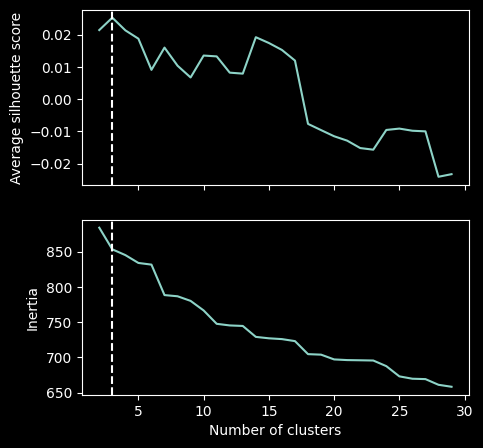

In [6]:
import seaborn as sns

plt.style.use("dark_background")

figure, axes = plt.subplots(2, 1, sharex=True, figsize=(5,5), sharey=False)
sns.lineplot(data=cluster_results,
            x="Number of clusters",
            y="Average silhouette score",
            ax = axes[0])
axes[0].axvline(x=3, color="w", linestyle = "--")

sns.lineplot(data=cluster_results,
                x="Number of clusters",
                y="Inertia",
            ax = axes[1])
axes[1].axvline(x=3, color="w", linestyle = "--")

Re-run clulstering with the optimum K determined above. Create a dataframe of patient Ids labelled with their cluster. 

Save to new file to run tests on cluster separation (UMAP and PCA) and make heatmaps later

In [7]:
kmedoid_clusters = KMedoids(n_clusters=3, random_state=42, metric="jaccard").fit(input_data)

cluster_labelled = pd.DataFrame({'Patient ID': df_matrix.columns,
                                 'Cluster': kmedoid_clusters.labels_})

cluster_labelled

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/pairwise.py:2463: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/pairwise.py:2463: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


,Patient ID,Cluster
0,mapped_2905_2905,0
1,mapped_6026_6026,0
2,mapped_9031_9031,0
3,mapped_678_678,0
4,mapped_8069_8069,2
...,...,...
1690,mapped_3266_3266,1
1691,mapped_9268_9268,1
1692,mapped_8794_8794,1
1693,mapped_4382_4382,2


In [8]:
# Save the cluster labelled dataframe to a file
cluster_labelled.to_csv('CD-ptclusters.tsv', sep='\t', index=False)

**Principle Componenet Aanalysis**

Assessing seperation of clusters. This is a simple initial PCA

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/pyth

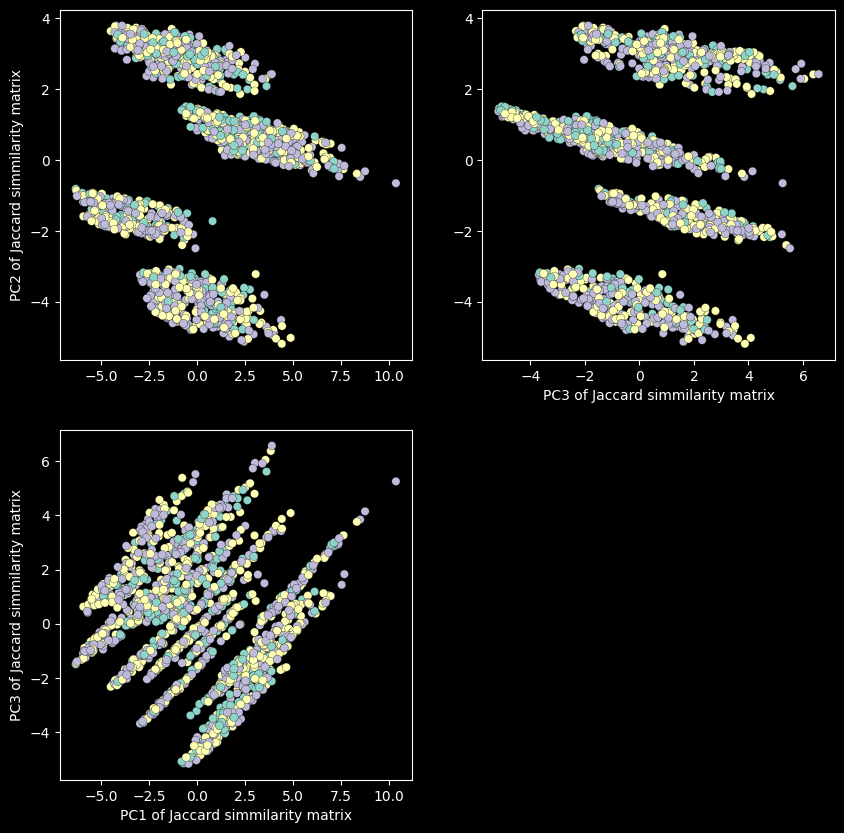

In [9]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=10)
X_pca = pca.fit(distance_matrix).transform(distance_matrix)

# Plotting the PCA results

plt.style.use("dark_background")

figure, axes = plt.subplots(2, 2, sharex=False, figsize=(10,10), sharey=False)

sns.scatterplot(ax = axes[0,0], x = X_pca[:,0], y = X_pca[:,1], hue = kmedoid_clusters.labels_, 
                palette ="Set3", legend = False, edgecolor = "black", linewidth=0.2)
sns.scatterplot(ax = axes[0,1], x = X_pca[:,2], y = X_pca[:,1], hue = kmedoid_clusters.labels_, 
                palette ="Set3", legend = False, edgecolor = "black", linewidth=0.2)
sns.scatterplot(ax = axes[1,0], x = X_pca[:,0], y = X_pca[:,2], hue = kmedoid_clusters.labels_, 
                palette ="Set3", legend = False, edgecolor = "black", linewidth=0.2)

axes[0,0].set(ylabel='PC2 of Jaccard simmilarity matrix')
axes[1,0].set(ylabel='PC3 of Jaccard simmilarity matrix')

axes[1,0].set(xlabel='PC1 of Jaccard simmilarity matrix')
axes[0,1].set(xlabel='PC3 of Jaccard simmilarity matrix')

axes[0,0].set_facecolor('black')
axes[0,1].set_facecolor('black')
axes[1,0].set_facecolor('black')

axes[1,1].axis('off')

figure.patch.set_facecolor('black')

#save figure to PDF
#plt.savefig('CD_PCA_clusters.pdf', bbox_inches='tight', facecolor='black')

**UMAP of clusters**

In [14]:
input_data

Affected protein,IRF2,GMEB2,RHOXF1,NFIX,ESR1,MITF,RARA,ZNF460,TP63,ARID3A,...,JUN,IRF3,TCF7L2,KLF15,CREB3L2,SREBF2,NFIC,ARNT,STAT5B,GFI1B
mapped_2905_2905,0,1,0,0,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,0
mapped_6026_6026,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,1,0,1
mapped_9031_9031,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,1,1,0,1,1,0
mapped_678_678,1,0,1,1,0,0,1,1,0,1,...,1,1,1,1,0,0,1,0,0,1
mapped_8069_8069,0,0,0,1,0,0,0,0,1,0,...,1,1,1,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mapped_3266_3266,0,0,0,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,1
mapped_9268_9268,0,1,0,0,1,1,0,0,0,0,...,0,0,1,0,1,1,0,1,1,1
mapped_8794_8794,0,0,0,1,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
mapped_4382_4382,0,0,0,0,1,0,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1


In [19]:
import umap.umap_ as umap

reducer = umap.UMAP(random_state=42, metric="jaccard")
reducer.fit(input_data)
embedding_pts = reducer.transform(input_data)
assert(np.all(embedding_pts == reducer.embedding_))
embedding_pts_df = pd.DataFrame(embedding_pts, index=input_data.index, columns=['UMAP1', 'UMAP2'])
embedding_pts_df = embedding_pts_df.reset_index().rename(columns={'index': 'Patient ID'})
embedding_pts_df

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1887: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


,Patient ID,UMAP1,UMAP2
0,mapped_2905_2905,-1.762890,-2.569666
1,mapped_6026_6026,1.370708,11.750076
2,mapped_9031_9031,-2.802783,13.291199
3,mapped_678_678,12.266269,4.621977
4,mapped_8069_8069,1.335931,6.466846
...,...,...,...
1690,mapped_3266_3266,0.282520,-2.635440
1691,mapped_9268_9268,-0.082375,14.203478
1692,mapped_8794_8794,1.928009,-0.043931
1693,mapped_4382_4382,0.160317,-2.613321


In [24]:
embedding_with_clusters = pd.merge(embedding_pts_df, cluster_labelled, on="Patient ID")
embedding_with_clusters

,Patient ID,UMAP1,UMAP2,Cluster
0,mapped_2905_2905,-1.762890,-2.569666,0
1,mapped_6026_6026,1.370708,11.750076,0
2,mapped_9031_9031,-2.802783,13.291199,0
3,mapped_678_678,12.266269,4.621977,0
4,mapped_8069_8069,1.335931,6.466846,2
...,...,...,...,...
1690,mapped_3266_3266,0.282520,-2.635440,1
1691,mapped_9268_9268,-0.082375,14.203478,1
1692,mapped_8794_8794,1.928009,-0.043931,1
1693,mapped_4382_4382,0.160317,-2.613321,2


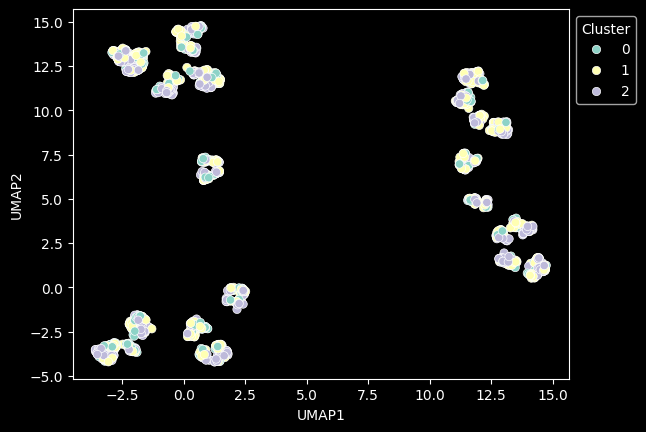

In [26]:
#PLot out the UMAP 
ax2 = sns.scatterplot(data=embedding_with_clusters,
                x="UMAP1",
                y="UMAP2",
                hue ="Cluster",
                palette ="Set3")
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))